In [1]:
!curl -L "https://public.roboflow.com/ds/WR5OCb87sw?key=2dbcCWGChe" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   1361      0 --:--:-- --:--:-- --:--:--  1362
100 46.0M  100 46.0M    0     0  3829k      0  0:00:12  0:00:12 --:--:-- 4240k0k    0     0  2326k      0  0:00:20  0:00:03  0:00:17 3099k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0

In [2]:
%cd /Users/pothole
!git clone https://github.com/ultralytics/yolov5.git

[Errno 2] No such file or directory: '/content'
/Users/imkyeongjin/pothole
Cloning into 'yolov5'...


/opt/anaconda3/envs/2024nlp/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 82), reused 100 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.70 MiB | 2.25 MiB/s, done.
Resolving deltas: 100% (11611/11611), done.


In [5]:
%cd /Users/pothole/yolov5/
!pip install -r requirements.txt

/Users/imkyeongjin/pothole/yolov5


/opt/anaconda3/envs/2024nlp/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 4.0 MB/s eta 0:00:0000:0100:01
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.8/874.8 kB 4.5 MB/s eta 0:00:00
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.60.0
    Uninstalling tqdm-4.60.0:
      Successfully uninstalled tqdm-4.60.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1


In [6]:
%cat /Users/pothole/dataset/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [7]:
%cd /
from glob import glob

train_img_list = glob('/Users/pothole/dataset/train/images/*.jpg')

print(len(train_img_list))

/
465


In [8]:
%cd /
from glob import glob

valid_img_list = glob('/Users/pothole/dataset/valid/images/*.jpg')

print(len(valid_img_list))

/
133


In [9]:
%cd /
from glob import glob

test_img_list = glob('/Users/pothole/dataset/test/images/*.jpg')

print(len(test_img_list))

/
67


In [11]:
with open('/Users/pothole/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/Users/pothole/dataset/val.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [12]:
import yaml

with open('/Users/pothole/dataset/data.yaml', 'r') as f:
  data = yaml.full_load(f)

print(data)

data['train'] = '/Users/pothole/dataset/train.txt'
data['val'] = '/Users/pothole/dataset/val.txt'

with open('/Users/pothole/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['pothole']}
{'train': '/Users/imkyeongjin/pothole/dataset/train.txt', 'val': '/Users/imkyeongjin/pothole/dataset/val.txt', 'nc': 1, 'names': ['pothole']}


In [13]:
%cd /Users/pothole/yolov5/

!python train.py --img 416 --batch 16 --epochs 50 --data /Users/pothole/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name pothole_yolov5s_results

/Users/imkyeongjin/pothole/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/imkyeongjin/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/Users/imkyeongjin/pothole/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pothole_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, lo

In [ ]:
from IPython.display import Image
import os

val_img_path = valid_img_list[1]

!python detect.py --weights /Users/pothole/yolov5/runs/train/pothole_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"

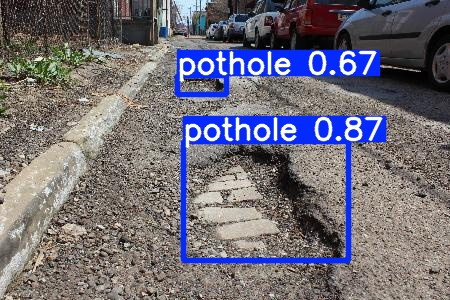

In [19]:
Image(os.path.join('/Users/pothole/yolov5/runs/detect/exp4', os.path.basename(val_img_path)))

In [23]:
#!python3 detect.py --weights runs/train/pothole_yolov5s_results/weights/best.pt --conf 0.5 --source 0

In [21]:
import cv2
import torch
import numpy as np
from glob import glob

yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/pothole/yolov5/runs/train/pothole_yolov5s_results/weights/best.pt')
yolo_model.eval()

model_type = "MiDaS_small"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

valid_img_list = glob('/Users/pothole/dataset/valid/images/*.jpg')
img_path = valid_img_list[9]

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img_rgb).to(device)

with torch.no_grad():
    depth_prediction = midas(input_batch)
    depth_prediction = torch.nn.functional.interpolate(
        depth_prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

# 깊이 맵 시각화
depth_map = depth_prediction.cpu().numpy()
depth_map_normalized = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX)
depth_map_uint8 = (depth_map_normalized * 255).astype(np.uint8)
depth_colormap = cv2.applyColorMap(depth_map_uint8, cv2.COLORMAP_MAGMA)

# 포트홀 감지
results = yolo_model(img)
pothole_boxes = results.xyxy[0].cpu().numpy()

for box in pothole_boxes:
    x1, y1, x2, y2, conf, cls = box
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    pothole_depth_map = depth_map[y1:y2, x1:x2]
    median_depth = np.median(pothole_depth_map)
    
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    text = f"Depth: {median_depth:.2f}"
    text_position = (x1, y1 - 10) if y1 - 10 > 10 else (x1, y1 + 20)
    cv2.putText(img, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    img[y1:y2, x1:x2] = cv2.addWeighted(img[y1:y2, x1:x2], 0.6, depth_colormap[y1:y2, x1:x2], 0.4, 0)

output_path = '/Users/pothole/detected_depth_image2.jpg'
cv2.imwrite(output_path, img)
print(f"결과 이미지를 '{output_path}'에 저장했습니다.")



Using cache found in /Users/imkyeongjin/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-5 Python-3.12.4 torch-2.4.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Using cache found in /Users/imkyeongjin/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /Users/imkyeongjin/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Loading weights:  None


Using cache found in /Users/imkyeongjin/.cache/torch/hub/intel-isl_MiDaS_master
/Users/imkyeongjin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


결과 이미지를 '/Users/imkyeongjin/pothole/detected_depth_image2.jpg'에 저장했습니다.


In [ ]:
import cv2
import torch
import numpy as np

yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/pothole/yolov5/runs/train/pothole_yolov5s_results/weights/best.pt')
yolo_model.eval()

model_type = "MiDaS_small"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

input_video_path = '/Users/pothole/pothole_origin.mp4'
output_video_path = '/Users/pothole/pothole_result.mp4'

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print(f"Error: Could not open input video '{input_video_path}'")
    exit()

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
if not out.isOpened():
    print(f"Error: Could not open output video '{output_video_path}'")
    cap.release()
    exit()

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print(f"Finished processing video. Total frames processed: {frame_count}")
        break

    frame_count += 1
    print(f"Processing frame {frame_count}")

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_batch = transform(frame_rgb).to(device)

    with torch.no_grad():
        depth_prediction = midas(input_batch)
        depth_prediction = torch.nn.functional.interpolate(
            depth_prediction.unsqueeze(1),
            size=frame.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    # 깊이 맵 시각화
    depth_map = depth_prediction.cpu().numpy()
    depth_map_normalized = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX)
    depth_map_uint8 = (depth_map_normalized * 255).astype(np.uint8)
    depth_colormap = cv2.applyColorMap(depth_map_uint8, cv2.COLORMAP_MAGMA)

    results = yolo_model(frame)
    pothole_boxes = results.xyxy[0].cpu().numpy()

    for box in pothole_boxes:
        x1, y1, x2, y2, conf, cls = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        pothole_depth_map = depth_map[y1:y2, x1:x2]
        median_depth = np.median(pothole_depth_map)

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        text = f"Depth: {median_depth:.2f}"
        text_position = (x1, y1 - 10) if y1 - 10 > 10 else (x1, y1 + 20)
        cv2.putText(frame, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 0.6, depth_colormap[y1:y2, x1:x2], 0.4, 0)

    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
# Real-World
import cv2
import torch
import numpy as np

yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/pothole_yolov5s_results/weights/best.pt')
yolo_model.eval()

model_type = "MiDaS_small"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_batch = transform(frame_rgb).to(device)

    with torch.no_grad():
        depth_prediction = midas(input_batch)
        depth_prediction = torch.nn.functional.interpolate(
            depth_prediction.unsqueeze(1),
            size=frame.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    depth_map = depth_prediction.cpu().numpy()
    depth_map_normalized = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX)
    depth_map_uint8 = (depth_map_normalized * 255).astype(np.uint8)
    depth_colormap = cv2.applyColorMap(depth_map_uint8, cv2.COLORMAP_MAGMA)

    results = yolo_model(frame)
    pothole_boxes = results.xyxy[0].cpu().numpy()

    for box in pothole_boxes:
        x1, y1, x2, y2, conf, cls = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        pothole_depth_map = depth_map[y1:y2, x1:x2]

        median_depth = np.median(pothole_depth_map)

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        text = f"Depth: {median_depth:.2f}"
        text_position = (x1, y1 - 10) if y1 - 10 > 10 else (x1, y1 + 20)
        cv2.putText(frame, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 0.6, depth_colormap[y1:y2, x1:x2], 0.4, 0)

    cv2.imshow('Pothole Detection with Depth', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
